# Exercise 02 : Bar


Sum of commits:
daypart
evening      1611
afternoon    1391
morning       184
night          21
dtype: int64
Day with most commits and evening > afternoon: 2020-05-12


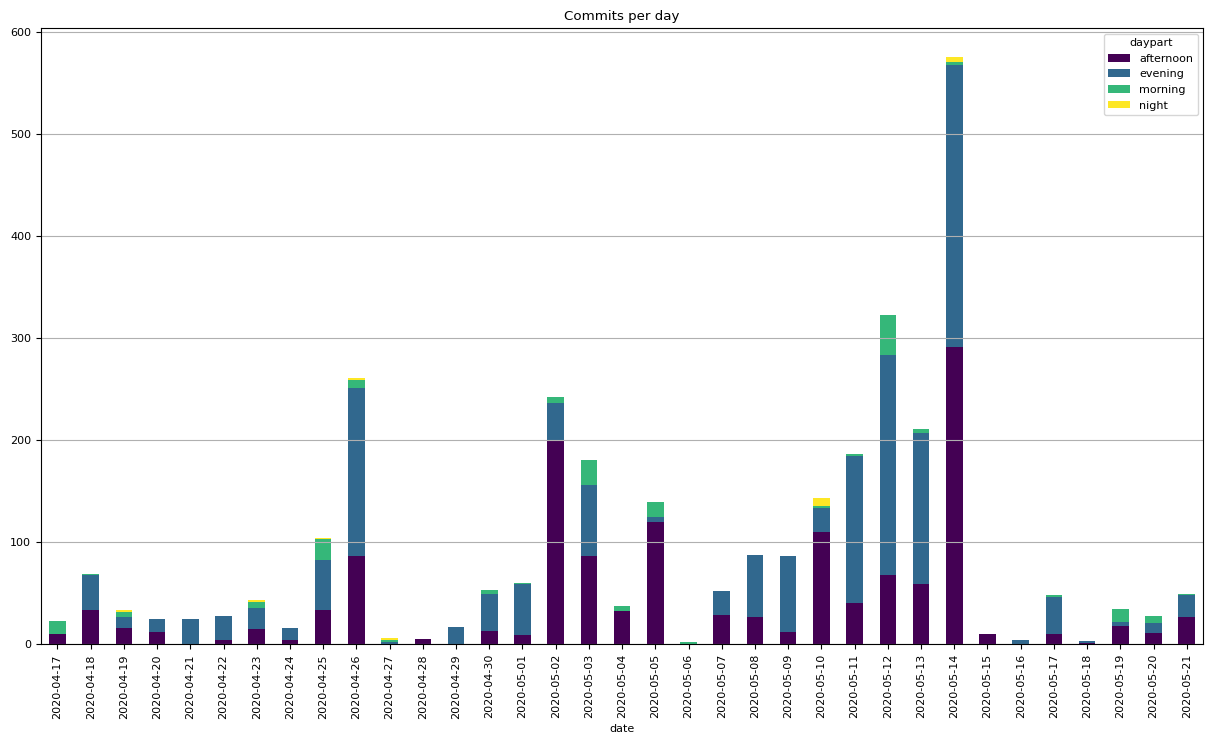

In [14]:
import pandas as pd
import sqlite3

def daypart(h):
    if 0 <= h <= 3: return 'night'
    if 4 <= h <= 9: return 'morning'
    if 10 <= h <= 16: return 'afternoon'
    return 'evening'

con = sqlite3.connect(r"../data/checking-logs.sqlite")

checker = pd.read_sql("""
SELECT uid, timestamp, 1 as commits
FROM checker 
WHERE uid LIKE 'user_%'
""", con, parse_dates=['timestamp'])

checker['date'] = checker['timestamp'].dt.date
checker['hour'] = checker['timestamp'].dt.hour
checker['daypart'] = checker['hour'].apply(daypart)

pivot = checker.groupby(['date', 'daypart'])['commits'].count().unstack(fill_value=0)

# print("Диапазон значений комитов:")
# print(pivot.describe())

ax = pivot.plot(
    kind='bar', 
    stacked=True, 
    figsize=(15, 8),
    title='Commits per day',
    fontsize=8,
    # grid=False,
    rot=90,
    colormap='viridis'
)

ax.grid(axis='y', alpha=1)
# ax.grid(axis='x', linestyle=':', color='gray', alpha=0.5)

# Questions
total_per_part = pivot.sum().sort_values(ascending=False)
print("\nSum of commits:")
print(total_per_part)

even_gt_aft = pivot[pivot['evening']>pivot['afternoon']]
day_ans = even_gt_aft.sum(axis=1).idxmax()
print("Day with most commits and evening > afternoon:", day_ans)
con.close()


**When do our users usually commit the labs: in the night, morning, afternoon, or evening?**  
Answer: **evening, afternoon**.

**Which day has the most number of commits and at the same time evening > afternoon?**  
Answer: **2020-05-12**.
